### Import

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

### Features e insights

Os componentes de um passeio aleatório — sentido e magnitude — podem estar representados de forma composta, como uma única entidade, ou decomposta, como variáveis separadas.

**Sentido**

- Pode assumir valores discretos no conjunto {−1, 0, 1}.  
- A distribuição de probabilidade associada ao sentido determina a direção predominante do passeio aleatório, indicando se sua tendência será crescente, decrescente ou estável.

**Magnitude**

- Pode ser representada como um valor percentual ou absoluto, assumindo apenas valores estritamente positivos.  
- A distribuição de probabilidade da magnitude determina a escala ou intensidade das variações, influenciando a taxa de mudança ao longo do passeio aleatório.  
- Mesmo que a distribuição de probabilidade do sentido indique uma tendência de queda, o passeio aleatório pode apresentar crescimento se as magnitudes associadas ao crescimento (sentido = 1) forem significativamente maiores que as do decrescimento (sentido = -1). O inverso também é verdadeiro.

### Random walk

Random walk pelo valor percentual

#### Components

##### Sense

In [2]:
sense = [-1, 0, 1]

sense_distribuition = [0.40, 0.15, 0.45]
# sense_distribuition = None

sense_transition_matrix = [
    [0.65, 0.10, 0.25], #-1
    [0.64, 0.01, 0.35], # 0
    [0.35, 0.05, 0.60]  # 1
]

##### Magnitude

-1

In [3]:
magnitude_minus_one = [0.050, 0.075, 0.100]

magnitude_distribution_minus_one = [0.70, 0.25, 0.05]
# magnitude_distribution_minus_one = None

magnitude_transition_matrix_minus_one = [
    [0.20, 0.55, 0.25],
    [0.65, 0.20, 0.15],
    [0.05, 0.50, 0.45],
]

0

In [4]:
magnitude_zero = [0]

magnitude_distribution_zero = [1.00]
# magnitude_distribution_zero = None

magnitude_transition_matrix_zero= [
    [1.00]
]

+1

In [5]:
magnitude_plus_one = [0.050, 0.075, 0.100, 0.125, 0.150]

magnitude_distribution_plus_one = [0.50, 0.25, 0.125, 0.0625, 0.0625]
# magnitude_distribution_plus_one = None

magnitude_transition_matrix_plus_one= [
    [0.02, 0.14, 0.50, 0.30, 0.04],
    [0.12, 0.14, 0.50, 0.12, 0.12],
    [0.22, 0.24, 0.30, 0.12, 0.12],
    [0.10, 0.20, 0.30, 0.20, 0.20],
    [0.05, 0.10, 0.20, 0.40, 0.25]
]

#### Random walk with transition matrix

##### Function transition matrix

In [6]:
def random_walk_transition_matrix(states, transition_matrix, first, size):
    
    current = first
    
    sequence = [current]
    for _ in range(size - 1):
        current = np.random.choice(states, p=transition_matrix[states.index(current)])
        sequence.append(current)
        
    return np.array(sequence)

##### Size

In [7]:
size = 1_000

##### Choice senses

In [8]:
first_sense = np.random.choice(a=sense, replace=True, p=sense_distribuition)
senses = random_walk_transition_matrix(states=sense, transition_matrix=sense_transition_matrix, first=first_sense, size=size)
senses[0:20]

array([-1, -1, -1, -1,  1,  1, -1,  1, -1, -1,  1,  1, -1, -1,  1,  1,  1,
        1, -1, -1])

In [9]:
# unique_values, counts = np.unique(senses, return_counts=True)
# counts/counts.sum()

##### Choice magnitudes

In [10]:
_, counts = np.unique(senses, return_counts=True)

first_minus_one = np.random.choice(a=magnitude_minus_one, replace=True, p=magnitude_distribution_minus_one)
magnitudes_minus_one = random_walk_transition_matrix(states=magnitude_minus_one, transition_matrix=magnitude_transition_matrix_minus_one, first=first_minus_one, size=counts[0])

first_zero = np.random.choice(a=magnitude_zero, replace=True, p=magnitude_distribution_zero)
magnitudes_zero = random_walk_transition_matrix(states=magnitude_zero, transition_matrix=magnitude_transition_matrix_zero, first=first_zero, size=counts[1])

first_plus_one = np.random.choice(a=magnitude_plus_one, replace=True, p=magnitude_distribution_plus_one)
magnitudes_plus_one = random_walk_transition_matrix(states=magnitude_plus_one, transition_matrix=magnitude_transition_matrix_plus_one, first=first_plus_one, size=counts[2])

In [11]:
magnitudes = np.zeros(shape=(len(senses)))

magnitudes[(senses == -1)] = magnitudes_minus_one
magnitudes[(senses == 0)] = magnitudes_zero
magnitudes[(senses == 1)] = magnitudes_plus_one

magnitudes[0:20]

array([0.1  , 0.1  , 0.075, 0.1  , 0.075, 0.1  , 0.1  , 0.075, 0.1  ,
       0.1  , 0.05 , 0.125, 0.075, 0.05 , 0.1  , 0.125, 0.075, 0.15 ,
       0.075, 0.05 ])

In [12]:
# unique_values, counts = np.unique(magnitudes, return_counts=True)
# counts/counts.sum()

##### Signed magnitude

In [13]:
signed_magnitude = senses * magnitudes
signed_magnitude[0:20]

array([-0.1  , -0.1  , -0.075, -0.1  ,  0.075,  0.1  , -0.1  ,  0.075,
       -0.1  , -0.1  ,  0.05 ,  0.125, -0.075, -0.05 ,  0.1  ,  0.125,
        0.075,  0.15 , -0.075, -0.05 ])

##### Initial point

In [14]:
rng = np.random.default_rng()

initial_point = rng.integers(low=35, high=150, size=1)
initial_point

array([134])

##### Random walk

In [15]:
random_walk = signed_magnitude
random_walk[0] = 0
random_walk = 1 + random_walk
random_walk = random_walk.cumprod()
random_walk = initial_point * random_walk

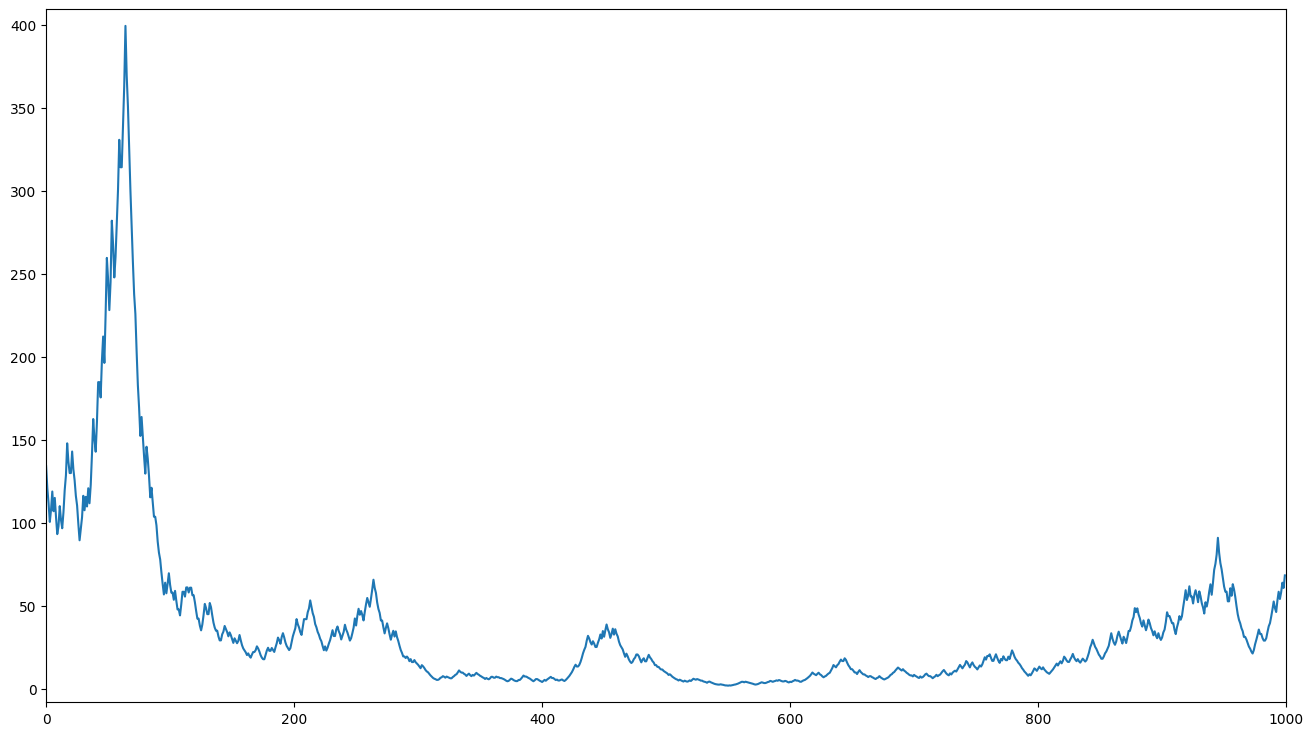

In [16]:
figure, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,9))

ax.set_xlim(xmin=0, xmax=size)
ax.set_ylim(ymin=random_walk.min() - 10, ymax=random_walk.max() + 10)
ax.plot(random_walk)

plt.show()